In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Handling Missing Values**

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
 # Dropping 'Cabin' due to a high number of missing values
df.drop(columns=['Cabin'], inplace=True)

**Encoding categorical variables**

In [6]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

**Exploratory Data Analysis (EDA)**

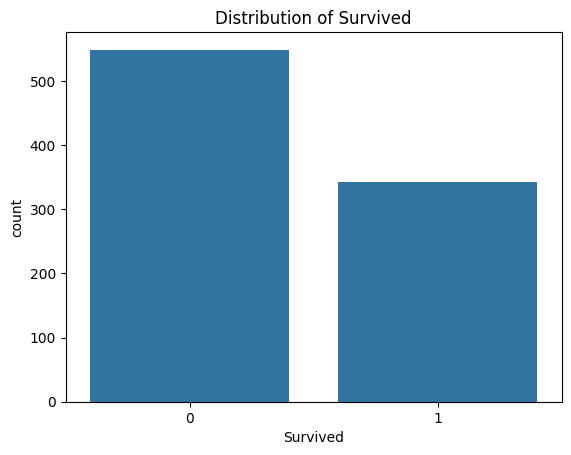

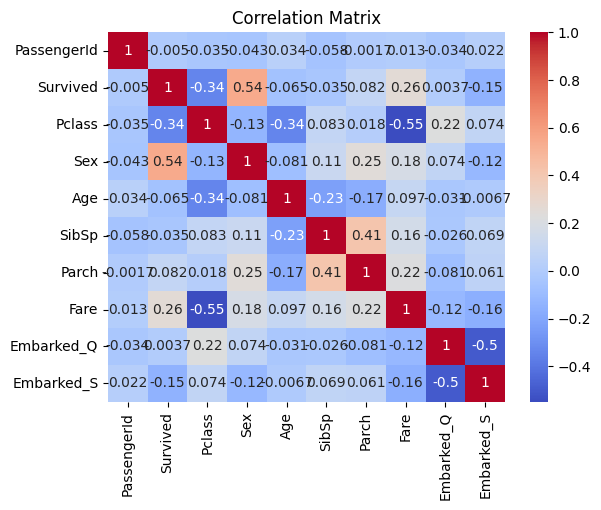

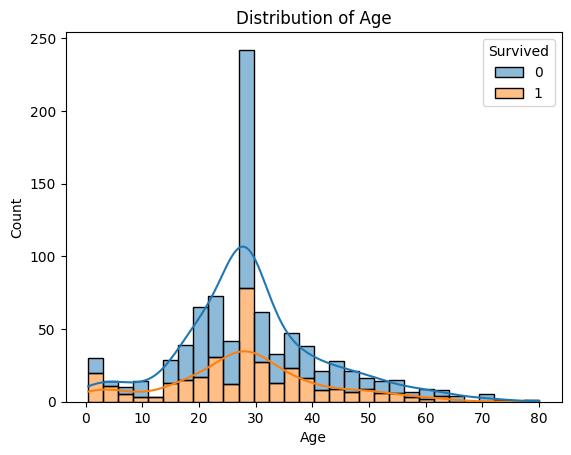

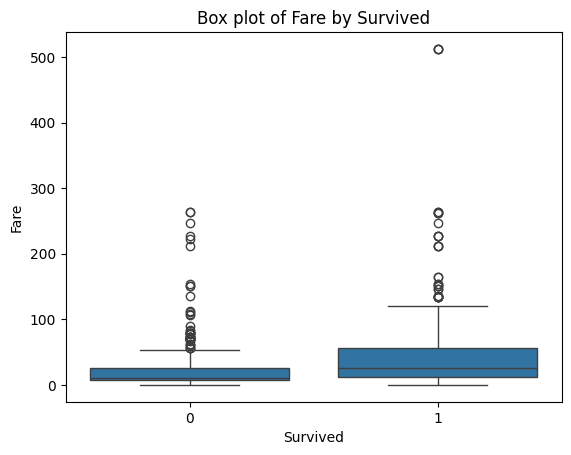

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ensure non-numeric columns are excluded
numeric_df = df.drop(columns=['Name', 'Ticket'])

# Creating new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Scaling numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


# Distribution of the target variable
sns.countplot(x='Survived', data=numeric_df)
plt.title('Distribution of Survived')
plt.show()

# Correlation matrix
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Age for Survived vs. Not Survived
sns.histplot(data=numeric_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Distribution of Age')
plt.show()

# Box plot of Fare by Survived
sns.boxplot(x='Survived', y='Fare', data=numeric_df)
plt.title('Box plot of Fare by Survived')
plt.show()


**Feature Engineering**

In [8]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
numeric_df = df.drop(columns=['Name', 'Ticket'])

# Scaling numerical features
scaler = StandardScaler()
numeric_df[['Age', 'Fare']] = scaler.fit_transform(numeric_df[['Age', 'Fare']])

# Handling outliers (for example, Fare)
numeric_df = numeric_df[numeric_df['Fare'] < numeric_df['Fare'].quantile(0.99)]

# Creating new feature: FamilySize
numeric_df['FamilySize'] = numeric_df['SibSp'] + numeric_df['Parch'] + 1

print(numeric_df.head())


   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    0 -0.565736      1      0 -0.502445   
1            2         1       1    1  0.663861      1      0  0.786845   
2            3         1       3    1 -0.258337      0      0 -0.488854   
3            4         1       1    1  0.433312      1      0  0.420730   
4            5         0       3    0  0.433312      0      0 -0.486337   

   Embarked_Q  Embarked_S  FamilySize  
0       False        True           2  
1       False       False           2  
2       False        True           1  
3       False        True           2  
4       False        True           1  


**Model Selection**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Splitting the dataset
X = numeric_df.drop(columns=['Survived'])
y = numeric_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')


Logistic Regression - Accuracy: 0.8362, F1 Score: 0.7786
Decision Tree - Accuracy: 0.8418, F1 Score: 0.7705
Random Forest - Accuracy: 0.8701, F1 Score: 0.8099
Gradient Boosting - Accuracy: 0.8475, F1 Score: 0.7692


**Hyperparameter Tuning**

In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Optimized Random Forest - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')


Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest - Accuracy: 0.8757, F1 Score: 0.8197


In [11]:
!pip install shap

****

**Model Interpretability**

Feature Importances:
 Sex            0.286761
Fare           0.193704
Age            0.156637
PassengerId    0.140370
Pclass         0.091011
FamilySize     0.050231
SibSp          0.031520
Embarked_S     0.021271
Parch          0.020218
Embarked_Q     0.008277
dtype: float64


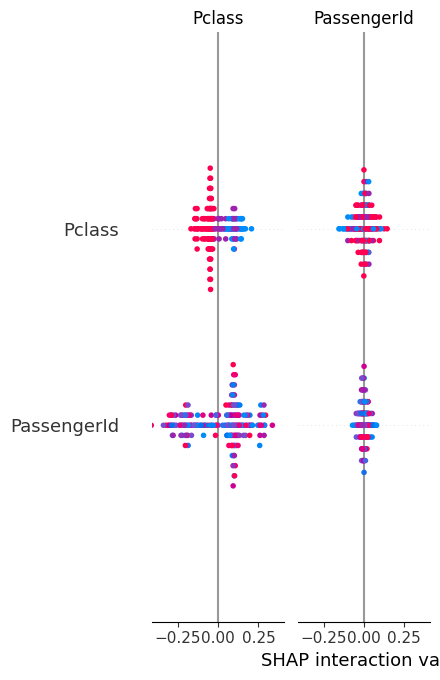

In [14]:
import shap
import pandas as pd

# Ensure all columns are numeric
#assert all(pd.api.types.is_numeric_dtype(df[col]) for col in df.columns if col != 'Survived')

# Feature importance
importances = best_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# SHAP values for model interpretability
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot a single prediction explanation
shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])
